In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_data = pd.read_csv('linearX.csv')
Y_data = pd.read_csv('linearY.csv')

In [2]:
X_data['0.99523'] = Y_data['0.99523']

In [3]:
def scale_min_max(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

In [4]:
X_data['9.1'] = scale_min_max(X_data['9.1'])
X_data['0.99523'] = scale_min_max(X_data['0.99523'])
X_data.rename(columns={'0.99523': 'Predict', '9.1': 'Actual'}, inplace=True)


In [5]:
Actual = X_data.drop('Predict', axis=1)
Predict = X_data['Predict']

In [6]:
Actual_train, Actual_test, Predict_train, Predict_test = train_test_split(Actual, Predict, test_size=0.2, random_state=42)

print(Actual_train.shape, Actual_test.shape, Predict_train.shape, Predict_test.shape)


(79, 1) (20, 1) (79,) (20,)


In [8]:
class GradientDescent:
    def __init__(self, learning_rate, epochs):
        self.slope = 0
        self.intercept = 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost_history = []
    
    def fit(self, Actual_train, Predict_train):
        Actual_train = np.array(Actual_train).flatten()
        Predict_train = np.array(Predict_train)
        
        for epoch in range(self.epochs):
            Predict_pred = self.slope * Actual_train + self.intercept
            slope_gradient = (-2 / len(Actual_train)) * np.sum((Predict_train - Predict_pred) * Actual_train)
            intercept_gradient = (-2 / len(Actual_train)) * np.sum(Predict_train - Predict_pred)
            
            self.slope -= self.learning_rate * slope_gradient
            self.intercept -= self.learning_rate * intercept_gradient
            
            cost = (1 / len(Actual_train)) * np.sum((Predict_train - Predict_pred) ** 2)
            self.cost_history.append(cost)
        
        print("Intercept: ", self.intercept, "Slope: ", self.slope)
    
    def predict(self, Actual_test):
        Actual_test = np.array(Actual_test).flatten()
        return self.slope * Actual_test + self.intercept


In [9]:
gd_model = GradientDescent(learning_rate=0.05, epochs=1000)
gd_model.fit(Actual_train, Predict_train)

Intercept:  0.35958763376575403 Slope:  0.5340311098499848


In [10]:
Predict_predictions = gd_model.predict(Actual_test)
print(Predict_predictions)

[0.44859282 0.59518959 0.61089639 0.62136759 0.45906402 0.52189121
 0.46953522 0.44335722 0.67895918 0.49571321 0.40147243 0.44335722
 0.5585404  0.69990158 0.63707439 0.48000641 0.35958763 0.60042519
 0.5323624  0.41194362]


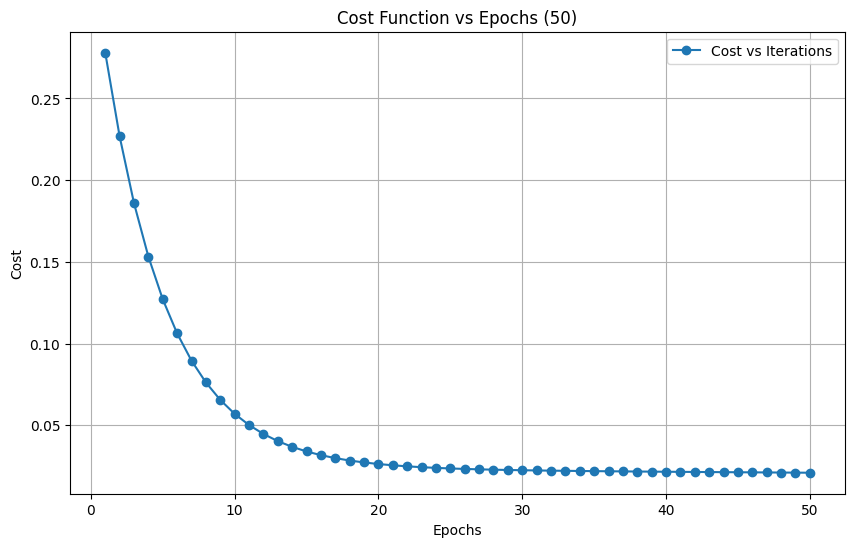

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), gd_model.cost_history[:50], marker='o', label='Cost vs Iterations')
plt.title("Cost Function vs Epochs (50)")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()


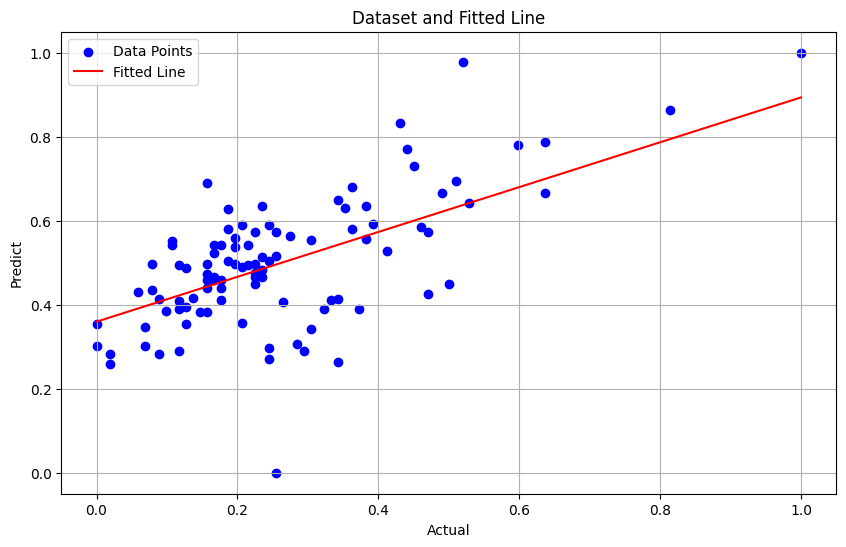

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual, Predict, color='blue', label='Data Points')
Actual_line = np.linspace(Actual.min().values[0], Actual.max().values[0], 100)
Predict_line = gd_model.slope * Actual_line + gd_model.intercept
plt.plot(Actual_line, Predict_line, color='red', label='Fitted Line')
plt.title("Dataset and Fitted Line")
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.legend()
plt.grid()
plt.show()

In [13]:
print("Final Cost Value with learning rate 0.5: ", gd_model.cost_history[-1])


Final Cost Value with learning rate 0.5:  0.010302170669380818


Intercept:  0.8015755502613956 Slope:  -0.0408920676531105


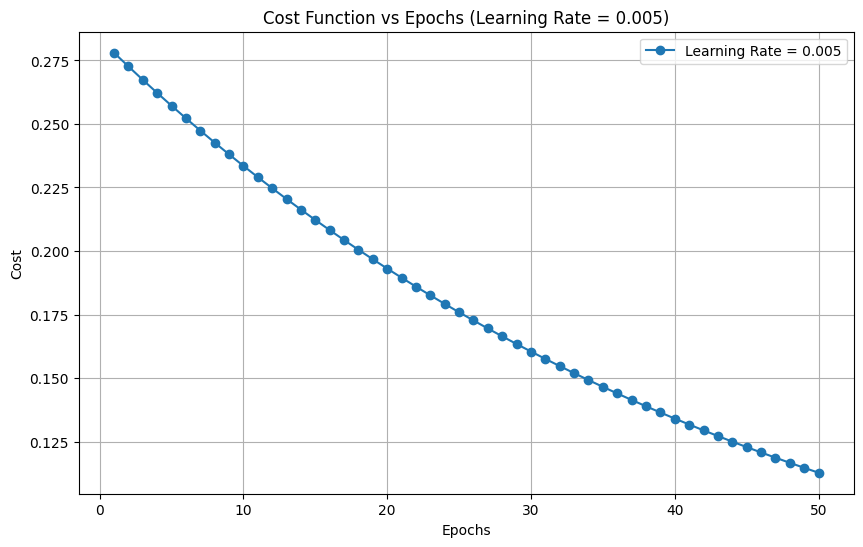

Intercept:  0.39494590035485927 Slope:  0.3951610173946835


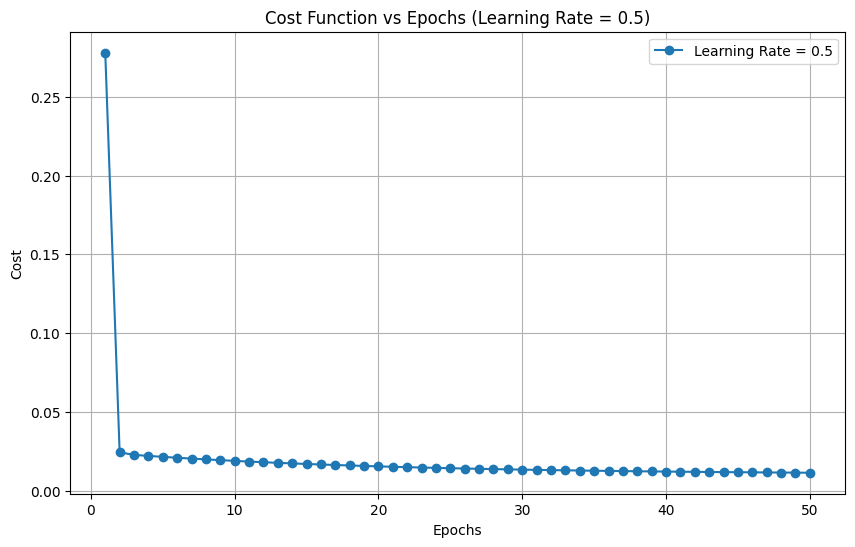

Intercept:  7.253313538032457e+48 Slope:  1.8467950096214363e+48


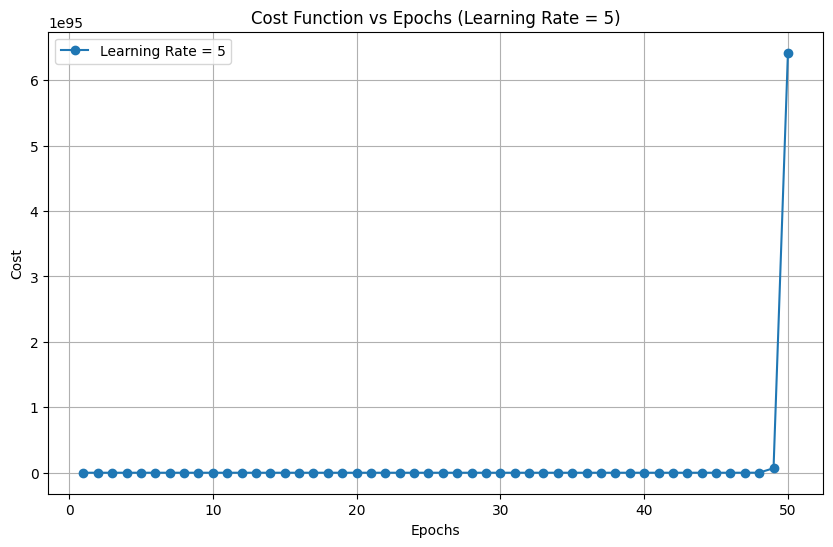

In [21]:
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    gd_model = GradientDescent(learning_rate=lr, epochs=50)
    gd_model.fit(Actual_train, Predict_train)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 51), gd_model.cost_history, marker='o', label=f"Learning Rate = {lr}")
    plt.title(f"Cost Function vs Epochs (Learning Rate = {lr})")
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.legend()
    plt.grid()
    plt.show()

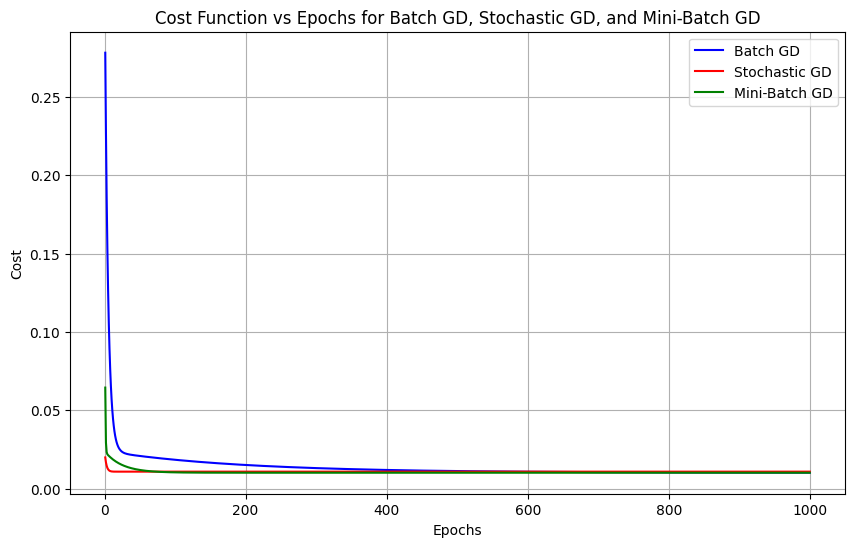

In [22]:
class BatchGD:
    def __init__(self, learning_rate, epochs):
        self.slope = 0
        self.intercept = 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost_history = []

    def fit(self, Actual_train, Predict_train):
        Actual_train = np.array(Actual_train).flatten()
        Predict_train = np.array(Predict_train)
        n = len(Actual_train)
        
        for epoch in range(self.epochs):
            y_pred = self.slope * Actual_train + self.intercept
            slope_grad = (-2 / n) * np.sum((Predict_train - y_pred) * Actual_train)
            intercept_grad = (-2 / n) * np.sum(Predict_train - y_pred)
            
            self.slope -= self.learning_rate * slope_grad
            self.intercept -= self.learning_rate * intercept_grad
            
            cost = (1 / n) * np.sum((Predict_train - y_pred) ** 2)
            self.cost_history.append(cost)


class StochasticGD:
    def __init__(self, learning_rate, epochs):
        self.slope = 0
        self.intercept = 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost_history = []

    def fit(self, Actual_train, Predict_train):
        Actual_train = np.array(Actual_train).flatten()
        Predict_train = np.array(Predict_train)
        n = len(Actual_train)
        
        for epoch in range(self.epochs):
            for i in range(n):
                X_single = Actual_train[i]
                y_single = Predict_train[i]
                
                y_pred = self.slope * X_single + self.intercept
                slope_grad = -2 * (y_single - y_pred) * X_single
                intercept_grad = -2 * (y_single - y_pred)
                
                self.slope -= self.learning_rate * slope_grad
                self.intercept -= self.learning_rate * intercept_grad
                
            cost = (1 / n) * np.sum((Predict_train - (self.slope * Actual_train + self.intercept)) ** 2)
            self.cost_history.append(cost)


class MiniBatchGD:
    def __init__(self, learning_rate, epochs):
        self.slope = 0
        self.intercept = 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost_history = []

    def fit(self, Actual_train, Predict_train, batch_size=10):
        Actual_train = np.array(Actual_train).flatten()
        Predict_train = np.array(Predict_train)
        n = len(Actual_train)
        
        for epoch in range(self.epochs):
            for batch_start in range(0, n, batch_size):
                X_batch = Actual_train[batch_start:batch_start + batch_size]
                y_batch = Predict_train[batch_start:batch_start + batch_size]
                
                y_pred = self.slope * X_batch + self.intercept
                slope_grad = (-2 / len(X_batch)) * np.sum((y_batch - y_pred) * X_batch)
                intercept_grad = (-2 / len(X_batch)) * np.sum(y_batch - y_pred)
                
                self.slope -= self.learning_rate * slope_grad
                self.intercept -= self.learning_rate * intercept_grad
                
            cost = (1 / n) * np.sum((Predict_train - (self.slope * Actual_train + self.intercept)) ** 2)
            self.cost_history.append(cost)


learning_rate = 0.05
epochs = 1000


batch_gd_model = BatchGD(learning_rate=learning_rate, epochs=epochs)
batch_gd_model.fit(Actual_train, Predict_train)


sgd_model = StochasticGD(learning_rate=learning_rate, epochs=epochs)
sgd_model.fit(Actual_train, Predict_train)


mini_batch_gd = MiniBatchGD(learning_rate=learning_rate, epochs=epochs)
mini_batch_gd.fit(Actual_train, Predict_train, batch_size=10)


plt.figure(figsize=(10, 6))


plt.plot(range(1, epochs+1), batch_gd_model.cost_history, label='Batch GD', color='blue')


plt.plot(range(1, epochs+1), sgd_model.cost_history, label='Stochastic GD', color='red')


plt.plot(range(1, epochs+1), mini_batch_gd.cost_history, label='Mini-Batch GD', color='green')

plt.title("Cost Function vs Epochs for Batch GD, Stochastic GD, and Mini-Batch GD")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()